# Introduction

#### Learning Goals of this Tutorial

A step-by-step, beginner-friendly tutorial on how to build an end-to-end Machine Learning Pipeline with PyCaret and deploy it as an API

* Build an end-to-end machine learning pipeline using PyCaret
* Develop an API using FastAPI to generate predictions on unseen data
* Use Python to send a request to API for generating predictions programmatically.

This tutorial will cover the entire machine learning life cycle at a high level which is broken down into the following sections:

#### Machine Learning High-Level Workflow

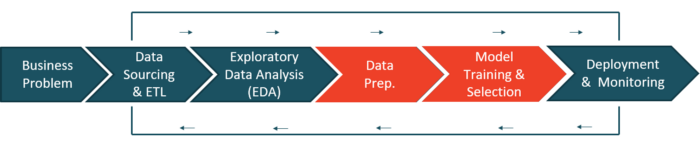

In [1]:
from IPython.display import Image
Image(filename="images/process.png")

# Tools

###  PyCaret  (alternative Sklearn ,Tensorflow ,Pytorch)

PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to build and deploy end-to-end ML prototypes quickly and efficiently.

#### Installing PyCaret

install slim version (default)<br>
**pip install pycaret**

install the full version <br>
**pip install pycaret[full]**


### FastAPI

FastAPI is a modern, fast (high-performance), web framework for building APIs with Python 3.6+ based on standard Python type hints.

The key features are:

- **Fast:** Very high performance, on par with NodeJS and Go (thanks to Starlette and Pydantic). One of the fastest Python frameworks available.

- **Fast to code:** Increase the speed to develop features by about 200% to 300%. *

- **Fewer bugs:** Reduce about 40% of human (developer) induced errors. *
- **Intuitive:** Great editor support. Completion everywhere. Less time debugging.
- **Easy:** Designed to be easy to use and learn. Less time reading docs.
- **Short:** Minimize code duplication. Multiple features from each parameter declaration. Fewer bugs.
- **Robust:** Get production-ready code. With automatic interactive documentation.
- **Standards-based:** Based on (and fully compatible with) the open standards for APIs:
- Read more https://www.toptal.com/python/build-high-performing-apps-with-the-python-fastapi-framework
* Read more https://realpython.com/fastapi-python-web-apis/

#### Installing FastAPI

**pip install fastapi**

### The workflow for PyCaret and FastAPI

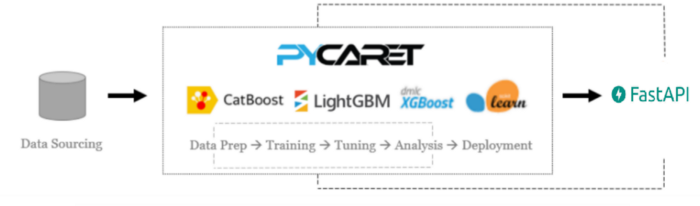

In [2]:
from IPython.display import Image
Image(filename="images/workflow.png")

# Business Problem

* We  will be using a very popular case study by Darden School of Business, published in Harvard Business
* The case is regarding the story of two people who are going to be married in the future
* The guy named Greg wanted to buy a ring to propose to a girl named Sarah
* The problem is to find the ring Sarah will like,but after a suggestion from his close friend, Greg decides to buy a diamond stone instead so that Sarah can decide her choice. Greg then collects data of 6000 diamonds with their price and attributes like cut, color, shape, etc.

https://hbsp.harvard.edu/product/UV0869-PDF-ENG

# Data

* We will be using a dataset from a very popular case study by the Darden School of Business, published in Harvard Businesshttps://hbsp.harvard.edu/product/UV0869-PDF-ENG
* The goal of this tutorial is to predict the diamond price based on its attributes like carat weight, cut, color, etc.
* You can download the dataset from PyCaret’s repository. https://github.com/pycaret/pycaret/tree/master/datasets

In [1]:
import pycaret

ModuleNotFoundError: No module named 'pycaret'

In [9]:
# load the dataset from pycaret
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# Exploratory Data Analysis

#### Let’s check the distribution of the target variable.

In [10]:
# plot histogram
fig = px.histogram(data, x=["Price"], template = 'plotly_dark', title = 'Histogram of Price')
fig.show()

Notice that distribution of Price is right-skewed, we can quickly check to see if log transformation can make Price approximately normal to give fighting chance to algorithms that assume normality.

In [11]:
import numpy as np
# create a copy of data
data_copy = data.copy()
# create a new feature Log_Price
data_copy['Log_Price'] = np.log(data['Price'])
# plot histogram
fig = px.histogram(data_copy, x=["Log_Price"], title = 'Histgram of Log Price', template = 'plotly_dark')
fig.show()

This confirms our hypothesis. The transformation will help us to get away with skewness and make the target variable approximately normal. Based on this, we will transform the Price variable before training our models.

# Data Preparation

*  PyCaret, the setup is the first and the only mandatory step in any machine learning experiment performed in PyCaret. This function takes care of all the data preparation required prior to training models.
*  PyCaret also offers a wide array of pre-processing features. To learn more about all the preprocessing functionalities in PyCaret,
https://pycaret.org/preprocessing/

In [15]:
# init setup
from pycaret.regression import *

# Whenever you initialize the setup function in PyCaret, it profiles the dataset and infers the data types for all input features

s = setup(data, target = 'Price', transform_target = True, normalize = True, normalize_method='minmax')

#   transform_target = True:   PyCaret will transform the Price variable behind the scene using box-cox transformation

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.3' currently installed).

# Model Training & Selection

 let’s start the training process by using compare_models functionality. This function trains all the algorithms available in the model library and evaluates multiple performance metrics using cross-validation.

In [6]:
# compare all models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,625.9467,1705237.1361,1278.5337,0.9839,0.0662,0.0482,0.4150
et,Extra Trees Regressor,716.9999,2056473.8227,1398.2331,0.9806,0.0785,0.0572,1.7370
gbr,Gradient Boosting Regressor,745.1270,2023402.8931,1417.0382,0.9803,0.0759,0.0568,0.5110
rf,Random Forest Regressor,722.2869,2176007.2004,1440.0430,0.9794,0.0776,0.0565,1.5860
dt,Decision Tree Regressor,938.1061,3457869.7994,1831.2467,0.9671,0.1005,0.0735,0.1040
ada,AdaBoost Regressor,2081.5356,17601083.7459,4155.2189,0.8335,0.1933,0.1575,0.3830
knn,K Neighbors Regressor,3262.9789,42984268.8724,6527.6304,0.5878,0.3879,0.2453,0.2280
omp,Orthogonal Matching Pursuit,3216.7843,63561220.1419,7861.5919,0.3749,0.2814,0.2203,0.0560
lasso,Lasso Regression,6659.1280,117094928.4627,10786.1066,-0.1248,0.7163,0.5716,0.0360
en,Elastic Net,6659.1280,117094928.4627,10786.1066,-0.1248,0.7163,0.5716,0.0510


The best model based on Mean Absolute Error (MAE) is Light Gradient Boosting Machine 

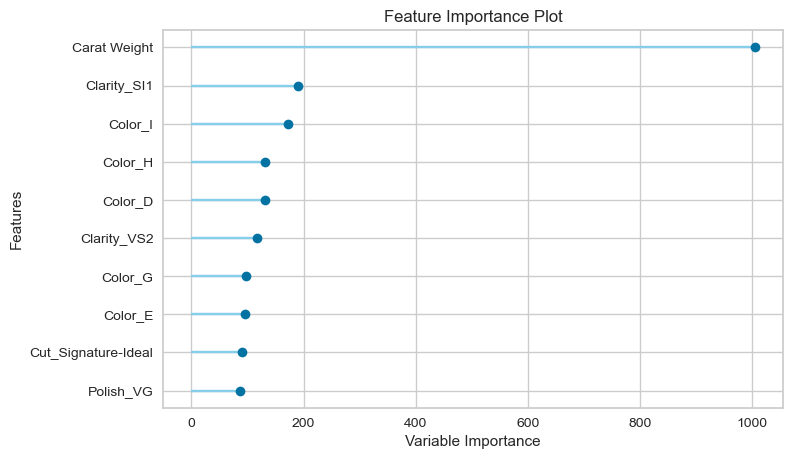

In [7]:
# check feature importance
plot_model(best, plot= 'feature')

# Finalize and Save Pipeline

In [8]:
# finalize the model
final_best = finalize_model(best)
# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.1,
                                                                          max_depth=-1,
                                                                          min_child_samples=20,
                                    

# Deployment  ( Pycharm & Heroku)

#### API APP CODEBASE  : https://github.com/Heytec/diamondapi

### First, let’s understand why to deploy machine learning models?

* The deployment of machine learning models is the process of making models available in production where web applications, enterprise software, and APIs can consume the trained model by providing new data points and generating predictions. 

* Normally machine learning models are built so that they can be used to predict an outcome (binary value i.e. 1 or 0 for Classification, continuous values for Regression, labels for Clustering

* There are two broad ways of generating predictions (i) predict by batch; and (ii) predict in real-time. This tutorial will show how you can deploy your machine learning models as API to predict in real-time.

* Now that we understand why deployment is necessary and we have everything we need to create an API i.e. Trained Model Pipeline as a pickle file. Creating an API is extremely simple using FastAPI.


In [4]:
# 1. Library imports
import pandas as pd
from pycaret.regression import load_model, predict_model
from fastapi import FastAPI
import uvicorn

# 2. Create the app object
app = FastAPI()

#. Load trained Pipeline
model = load_model('diamond-pipeline')
# loading the trained model diamond-pipeline from your disk (Your script must be in the same folder as the file).

# Define predict function
#  defining a function called predict which will take the input and internally uses PyCaret’s predict_model function to generate predictions and return the value as a dictionary
@app.post('/predict')
def predict(carat_weight, cut, color, clarity, polish, symmetry, report):
    data = pd.DataFrame([[carat_weight, cut, color, clarity, polish, symmetry, report]])
    data.columns = ['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

    predictions = predict_model(model, data=data) 
    return {'prediction': int(predictions['Label'][0])}

if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

ImportError: Pandas requires version '3.0.0' or newer of 'jinja2' (version '2.11.3' currently installed).

You can then run this script by running the following command in your command prompt. You must be in the same directory as the python script and the model pickle file is, before executing this command.

In [11]:
# uvicorn main:app --reload
  

This will initialize an API service on your localhost. On your browser type http://localhost:8000/docs 

# Heroku 

https://www.tutlinks.com/create-and-deploy-fastapi-app-to-heroku/

Notes incase of errors 
* 1) pip install gunicorn
* 2) pip freeze > requirements.txt
* 3) Create a file with the name Procfile without any extensions

web: gunicorn -w 4 -k uvicorn.workers.UvicornWorker main:app

* 4) Go to requirements.txt and delete  pywin32==301 pywinpty==1.1.3
* 5) make sure Pandas is version 1.2.4 pandas==1.2.4

# Final  API Docs



https://diamapi.herokuapp.com/docs

# Using  the API 

In [1]:
import requests

#
def get_predictions(carat_weight, cut, color, clarity, polish, symmetry, report):
    url = 'https://diamapi.herokuapp.com/predict?carat_weight={carat_weight}&cut={cut}&color={color}&clarity={clarity}&polish={polish}&symmetry={symmetry}&report={report}'\
    .format(carat_weight = carat_weight, cut = cut,\
     color = color, clarity = clarity, polish = polish, symmetry = symmetry, report = report)
    
    response = requests.post(url)
    json_response = response.json()
    price=json_response['prediction']
    return price

In [3]:
data.head(1)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.1,Ideal,H,SI1,VG,EX,GIA,5169


In [4]:
price=get_predictions(carat_weight=1.10, cut='Ideal', color='H', clarity='SI1', polish='VG', symmetry='EX', report='GIA')
print(price)

5421


# Use the API to Create Streamlit APP 

#### APP URL :  https://share.streamlit.io/heytec/diamondapp/main/main.py
#### Codebase URL : https://github.com/Heytec/diamondapp

In [ ]:
import streamlit as st
import requests


st.title('Diamond App')




def get_predictions(carat_weight, cut, color, clarity, polish, symmetry, report):
    url = 'https://diamapi.herokuapp.com/predict?carat_weight={carat_weight}&cut={cut}&color={color}&clarity={clarity}&polish={polish}&symmetry={symmetry}&report={report}' \
        .format(carat_weight=carat_weight, cut=cut, \
                color=color, clarity=clarity, polish=polish, symmetry=symmetry, report=report)
    response = requests.post(url)
    json_response = response.json()
    price=json_response['prediction']
    return price





carat_weight = st.number_input("Enter carat weight ")
cut= st.text_input("cut")
color= st.text_input("color")
clarity= st.text_input("clarity")
polish= st.text_input("polish")
symmetry= st.text_input("symmetry")
report= st.text_input("report")





result = ""

# when 'Predict' is clicked, make the prediction and store it
if st.button("Predict"):
    result= get_predictions(carat_weight=carat_weight, cut=cut, color=color, clarity=clarity, polish=polish,symmetry=symmetry, report=report)
    st.success(f'Price of Diamond  {result}')

credit : Pycaret Founder

# END
## Thank You.